In [ ]:
## Task 3: Imports vs. Exports of Electricity in NO2


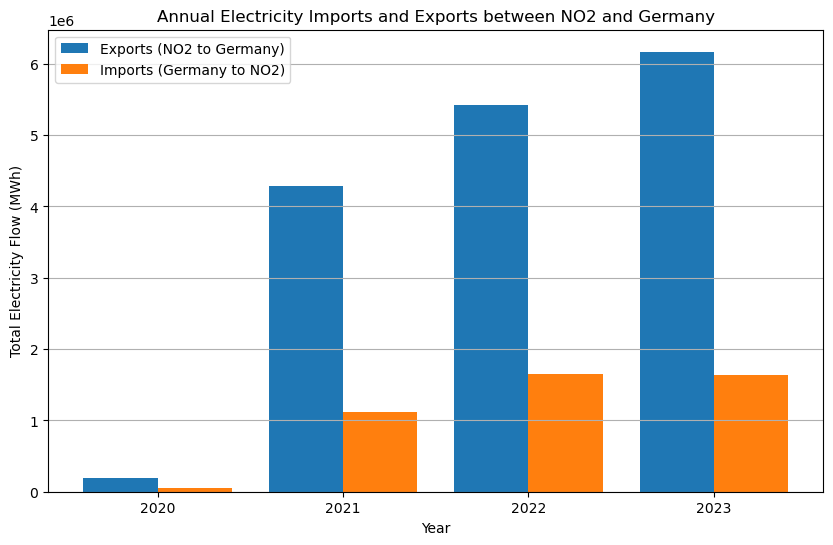

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Load all PhysicalFlows datasets
physical_flows_files = glob.glob("/Users/alexsolheim/Desktop/TECH2_TERM_PAPER/TECH2-H24-Termpaper-G9/data/PhysicalFlows_12.1.G/*.csv")

physical_flows_df_list = [pd.read_csv(file, delimiter="\t", encoding='utf-8') for file in physical_flows_files]
physical_flows_df = pd.concat(physical_flows_df_list, ignore_index=True)

# Convert DateTime column to datetime for easier manipulation
physical_flows_df['DateTime'] = pd.to_datetime(physical_flows_df['DateTime'])

# Filter data to only include rows related to NO2 and DE_LU
filtered_flows_df = physical_flows_df[
    ((physical_flows_df['InMapCode'] == 'NO2') & (physical_flows_df['OutMapCode'] == 'DE_LU')) |
    ((physical_flows_df['InMapCode'] == 'DE_LU') & (physical_flows_df['OutMapCode'] == 'NO2'))
].copy()

# Extract year from DateTime for grouping
filtered_flows_df.loc[:, 'Year'] = filtered_flows_df['DateTime'].dt.year

# Separate exports and imports
exports_df = filtered_flows_df[(filtered_flows_df['OutMapCode'] == 'NO2') & (filtered_flows_df['InMapCode'] == 'DE_LU')]
imports_df = filtered_flows_df[(filtered_flows_df['OutMapCode'] == 'DE_LU') & (filtered_flows_df['InMapCode'] == 'NO2')]

# Sum FlowValue for exports and imports per year
annual_exports = exports_df.groupby('Year')['FlowValue'].sum()
annual_imports = imports_df.groupby('Year')['FlowValue'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(annual_exports.index - 0.2, annual_exports.values, width=0.4, label='Exports (NO2 to Germany)')
plt.bar(annual_imports.index + 0.2, annual_imports.values, width=0.4, label='Imports (Germany to NO2)')
plt.xlabel('Year')
plt.ylabel('Total Electricity Flow (MWh)')
plt.title('Annual Electricity Imports and Exports between NO2 and Germany')
plt.legend()
plt.xticks(sorted(filtered_flows_df['Year'].unique()))
plt.grid(axis='y')

# Save the figure
plt.savefig("/Users/alexsolheim/Desktop/TECH2_TERM_PAPER/TECH2-H24-Termpaper-G9/figure_task3.png")
plt.show()
